### Задание regex2

In [2]:
import re

def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

**F. Буква Ё**

Найдите в тексте слова, содержащие букву ё, и верните список кортежей 
вида (индекс первой буквы слова, длина слова).

*Подсказка: здесь надо использовать `re.finditer` ([документация](https://docs.python.org/3/library/re.html#re.finditer), [пример использования](https://python-nsu.bitbucket.io/regexp_theme.html#finditer-–-когда-findall-не-справляется))*

In [3]:
def yo(text):
    return [(i.span()[0], i.span()[1] -i.span()[0]) for i in re.finditer(r'[А-Яа-яё]*ё[А-Яа-яё]*', text, re.I)]
#     return [(elem.span()[0], elem.span()[1] - elem.span()[0]) for elem in re.finditer(r'\b[А-Яа-я]*ё[А-Яа-я]*\b', text)]

test(yo(''), [])
test(yo('Ёж'), [(0, 2)])
test(yo('Четвёртый полёт ещё не завершён.'), 
        [(0, 9), (10, 5), (16, 3), (23, 8)])
test(yo('Президент Ниинистё живёт в районе Тёёлё в Хельсинки.'), 
        [(10, 8), (19, 5), (34, 5)])

 OK  got: [] expected: []
 OK  got: [(0, 2)] expected: [(0, 2)]
 OK  got: [(0, 9), (10, 5), (16, 3), (23, 8)] expected: [(0, 9), (10, 5), (16, 3), (23, 8)]
 OK  got: [(10, 8), (19, 5), (34, 5)] expected: [(10, 8), (19, 5), (34, 5)]


**G. Курсив**

Найдите прочерки, использующиеся для выделения текста вместо курсива, и «перевыделите»  
такой текст при помощи html-тегов `<i>` и `</i>`.

Например `'I _am_ sure.'` -> `'I <i>am</i> sure.'`

In [4]:
def italics(text):
    return re.sub(r'_([A-Za-zА-Яа-я]+(?:\s[A-Za-zА-Яа-я]*)*)_', r'<i>\1</i>', text)

test(italics('That was _awfully_ helpful.'),
             'That was <i>awfully</i> helpful.')
test(italics('And when _he_ says so, he _means_ it'),
             'And when <i>he</i> says so, he <i>means</i> it')
test(italics('And when _he_ says so, he _means_ it'),
             'And when <i>he</i> says so, he <i>means</i> it')
test(italics('That was a _really long_ day.'),
             'That was a <i>really long</i> day.')
test(italics('Анна Павловна кашляла несколько дней, у нее был '
    '_грипп_, как она говорила (_грипп_ был тогда новое слово, '
    'употреблявшееся только редкими)'),
             'Анна Павловна кашляла несколько дней, у нее был '
    '<i>грипп</i>, как она говорила (<i>грипп</i> был тогда новое слово, '
    'употреблявшееся только редкими)')
test(italics('dan_brown@mail.ru – мой _основной_ email!'),
             'dan_brown@mail.ru – мой <i>основной</i> email!'),

 OK  got: 'That was <i>awfully</i> helpful.' expected: 'That was <i>awfully</i> helpful.'
 OK  got: 'And when <i>he</i> says so, he <i>means</i> it' expected: 'And when <i>he</i> says so, he <i>means</i> it'
 OK  got: 'And when <i>he</i> says so, he <i>means</i> it' expected: 'And when <i>he</i> says so, he <i>means</i> it'
 OK  got: 'That was a <i>really long</i> day.' expected: 'That was a <i>really long</i> day.'
 OK  got: 'Анна Павловна кашляла несколько дней, у нее был <i>грипп</i>, как она говорила (<i>грипп</i> был тогда новое слово, употреблявшееся только редкими)' expected: 'Анна Павловна кашляла несколько дней, у нее был <i>грипп</i>, как она говорила (<i>грипп</i> был тогда новое слово, употреблявшееся только редкими)'
 OK  got: 'dan_brown@mail.ru – мой <i>основной</i> email!' expected: 'dan_brown@mail.ru – мой <i>основной</i> email!'


(None,)

**H. Пароль**

Дан пароль. Проверьте его «сложность». Для этого нужно подсчитать количество:  
  – строчных букв,  
  – заглавных букв,  
  – цифр,  
  – знаков препинания – то есть символов с кодами от `\x21`(восклицательный знак) до `\x7e` (тильда), кроме букв и цифр, а также  
  – допустимость, то есть отсутствие символов с кодом меньше `0x21`() и больше `0x7e`(тильда).  
  
Вернуть нужно tuple из 4 чисел и одного bool.

*Подсказка: в качестве границ диапазона можно указывать как сами символы `[!-~]`, так и их коды `[\x21-\07e]`.*
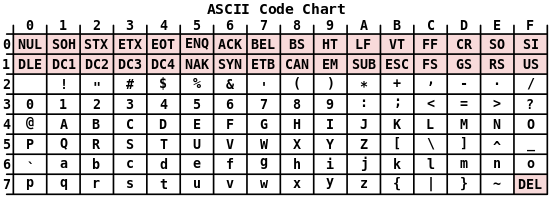

In [5]:
def strength(password):
    len_lower = len(re.findall(r'[a-z]', password))
    len_capital = len(re.findall(r'[A-Z]', password))
    len_numbers = len(re.findall(r'\d', password))
    len_punctuation = len(re.findall(r'[^\w\d]', password))
    len_admissibility = not bool(re.findall(r'[^\x20-\x7E]', password))
    return (len_lower,len_capital,len_numbers,
            len_punctuation,len_admissibility)
test(strength('qwerty'), (6, 0, 0, 0, True))
test(strength('Qwerty123!'), (5, 1, 3, 1, True))
test(strength('Пароль7'), (0, 0, 1, 0, False))

 OK  got: (6, 0, 0, 0, True) expected: (6, 0, 0, 0, True)
 OK  got: (5, 1, 3, 1, True) expected: (5, 1, 3, 1, True)
 OK  got: (0, 0, 1, 0, False) expected: (0, 0, 1, 0, False)


**I. Гиперссылки**

Преобразуйте найденные в строке ссылки в формате MarkDown в формат html, например,   
`[НГУ](http://nsu.ru)` → `<a href="http://nsu.ru">НГУ</a>`

In [102]:
def markdown(string):
    #return re.sub(r'(\[(.*?)\])(\(([\w:/.]+)\))', r'<a href="\4">\2</a>', string)  
    return re.sub(r'(\[([^]]+)\])(\(([\w:/.]+)\))', r'<a href="\4">\2</a>', string)


test(markdown('[Google](http://google.com)'), 
              '<a href="http://google.com">Google</a>')
test(markdown('[1][Google – поиск №1](http://google.com)'), 
              '[1]<a href="http://google.com">Google – поиск №1</a>')
test(markdown('[Google](http://google.com)(2)'), 
              '<a href="http://google.com">Google</a>(2)')
test(markdown('[Яндекс!](http://ya.ru) и [百度](http://baidu.com)'), 
              '<a href="http://ya.ru">Яндекс!</a> и <a href="http://baidu.com">百度</a>')

 OK  got: '<a href="http://google.com">Google</a>' expected: '<a href="http://google.com">Google</a>'
 OK  got: '[1]<a href="http://google.com">Google – поиск №1</a>' expected: '[1]<a href="http://google.com">Google – поиск №1</a>'
 OK  got: '<a href="http://google.com">Google</a>(2)' expected: '<a href="http://google.com">Google</a>(2)'
 OK  got: '<a href="http://ya.ru">Яндекс!</a> и <a href="http://baidu.com">百度</a>' expected: '<a href="http://ya.ru">Яндекс!</a> и <a href="http://baidu.com">百度</a>'


**J. Неисполняемые файлы**

Одним регулярным выражением выделите из списка файлов все, кроме исполняемых  
(то есть .exe и .bat). Whitespace (то есть пробелов, табуляций и переводов строк)  
в именах файлов содержаться не может. Имена файлов разделены whitespace'ом.

*Подсказка: здесь нужно использовать look-behind ([примеры использования](https://python-nsu.bitbucket.io/lookaheads_and_lookbehinds.html))*

In [7]:
def non_executable(text):
    return re.findall(r'\S+(?<!\.bat|\.exe)(?=\s|$)', text)

test(non_executable('1.txt dir1 virus.exe 2017-01-02.log'),
     ['1.txt', 'dir1', '2017-01-02.log'])
test(non_executable('kill_them_all.bat report.doc virus.exe.zip'), 
     ['report.doc', 'virus.exe.zip'])

 OK  got: ['1.txt', 'dir1', '2017-01-02.log'] expected: ['1.txt', 'dir1', '2017-01-02.log']
 OK  got: ['report.doc', 'virus.exe.zip'] expected: ['report.doc', 'virus.exe.zip']
